In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dhaka-city-dengue-prevention/Dhaka_city_dengue.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("/kaggle/input/dhaka-city-dengue-prevention/Dhaka_city_dengue.csv")
data

,Gender,Age,NS1,IgG,IgM,Area,AreaType,HouseType,District,Outcome
0,Female,45,0,0,0,Mirpur,Undeveloped,Building,Dhaka,0
1,Male,17,0,0,1,Chawkbazar,Developed,Building,Dhaka,0
2,Female,29,0,0,0,Paltan,Undeveloped,Other,Dhaka,0
3,Female,63,1,1,0,Motijheel,Developed,Other,Dhaka,1
4,Male,22,0,0,0,Gendaria,Undeveloped,Building,Dhaka,0
...,...,...,...,...,...,...,...,...,...,...
995,Female,16,1,1,0,New Market,Developed,Building,Dhaka,1
996,Male,41,1,1,0,Paltan,Undeveloped,Other,Dhaka,1
997,Male,45,0,0,1,Motijheel,Developed,Building,Dhaka,0
998,Female,19,1,1,1,Paltan,Undeveloped,Building,Dhaka,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     1000 non-null   object
 1   Age        1000 non-null   int64 
 2   NS1        1000 non-null   int64 
 3   IgG        1000 non-null   int64 
 4   IgM        1000 non-null   int64 
 5   Area       1000 non-null   object
 6   AreaType   1000 non-null   object
 7   HouseType  1000 non-null   object
 8   District   1000 non-null   object
 9   Outcome    1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [5]:
import plotly.express as px
#bar chart for area distribution
fig=px.bar(data,x=data["Area"],title="Area distribution")
fig.show()

In [6]:
data.columns

Index(['Gender', 'Age', 'NS1', 'IgG', 'IgM', 'Area', 'AreaType', 'HouseType',
       'District', 'Outcome'],
      dtype='object')

In [7]:
plt.figure(figsize=(5,5))
fig=px.histogram(data,data['Age'])
fig.show()

<Figure size 500x500 with 0 Axes>

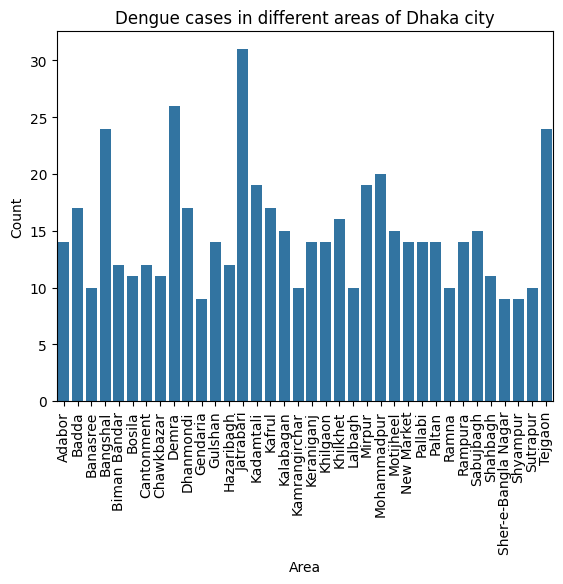

In [8]:
# Count of Outcome==0 for each Area
import seaborn as sns
X=data[data.Outcome == 1].groupby('Area').size()
sns.barplot(x=X.index, y=X.values)
plt.xticks(rotation=90)
plt.title('Dengue cases in different areas of Dhaka city')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

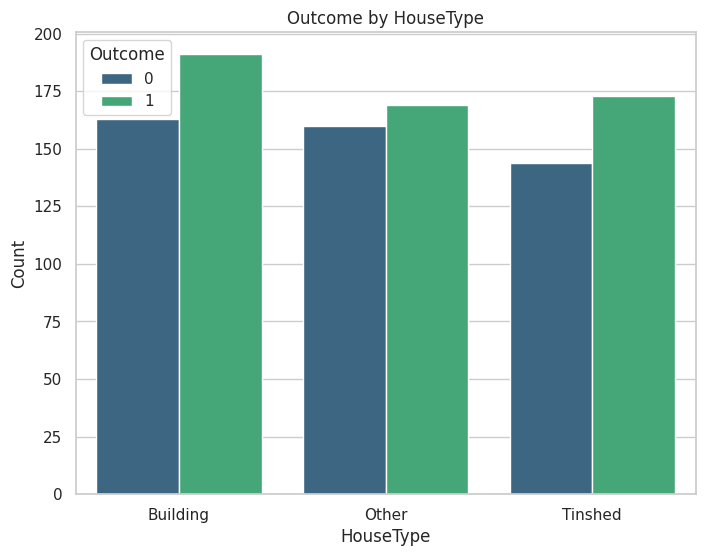

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseType', hue='Outcome', data=data, palette='viridis')
plt.title('Outcome by HouseType')
plt.xlabel('HouseType')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

In [10]:
data.HouseType.value_counts()

HouseType
Building    354
Other       329
Tinshed     317
Name: count, dtype: int64

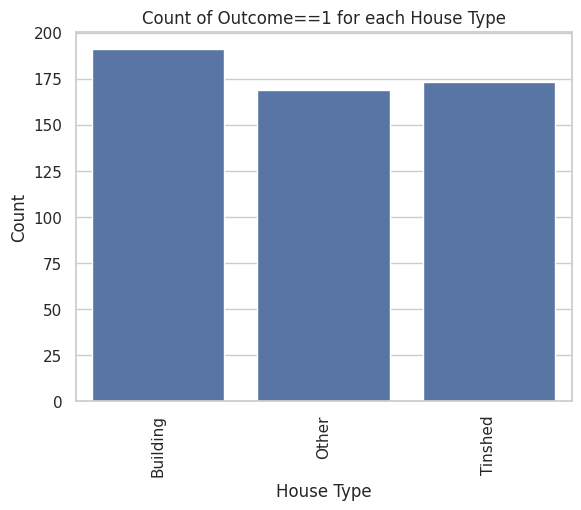

In [11]:
X = data[data.Outcome == 1].groupby('HouseType').size()
sns.barplot(x=X.index, y=X.values)
plt.xticks(rotation=90)
plt.title('Count of Outcome==1 for each House Type')
plt.xlabel('House Type')
plt.ylabel('Count')
plt.show()

In [12]:
data.Age.describe()

count    1000.000000
mean       35.924000
std        16.468437
min         8.000000
25%        22.000000
50%        37.000000
75%        50.000000
max        65.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

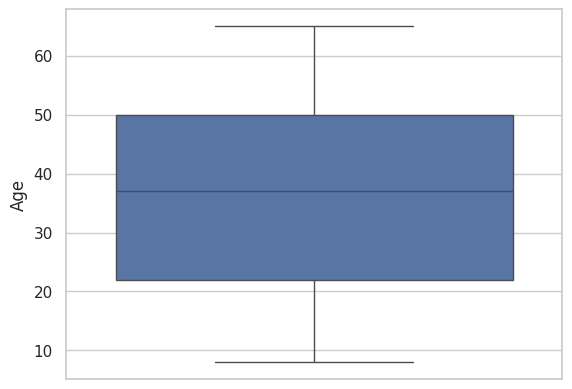

In [13]:
sns.boxplot(data["Age"])

/tmp/ipykernel_55/2843233866.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




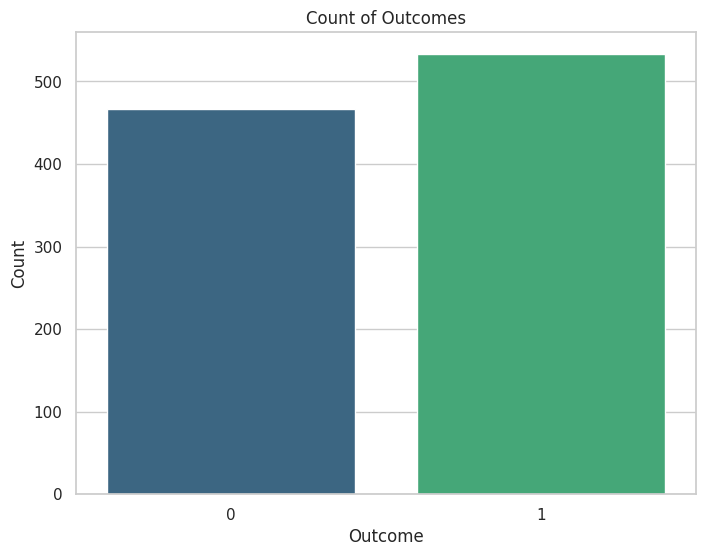

In [14]:
import seaborn as sns
sns.set(style="whitegrid")
# Countplot for Outcome
plt.figure(figsize=(8, 6))  
sns.countplot(x='Outcome', data=data, palette='viridis')
plt.title('Count of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

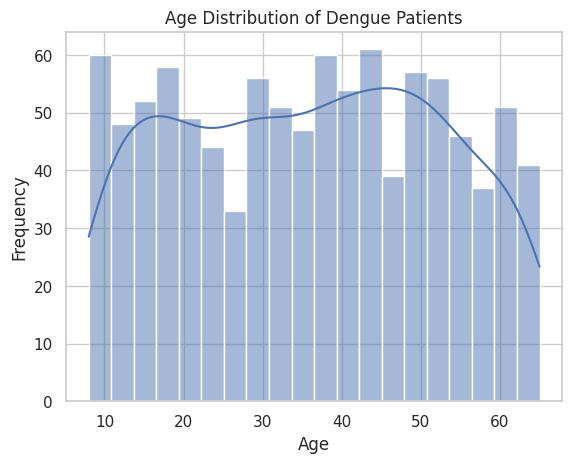

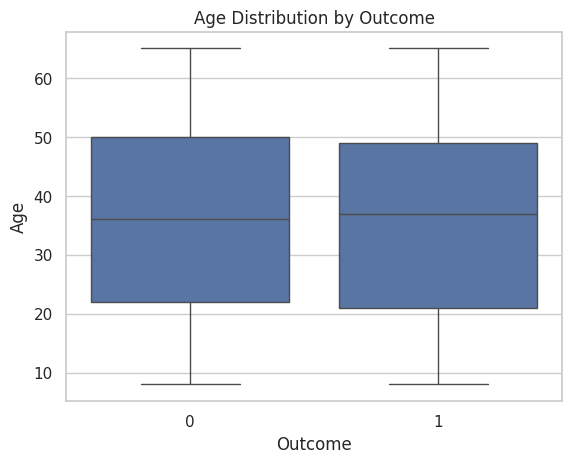

In [15]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Dengue Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x='Outcome', y='Age', data=data)
plt.title('Age Distribution by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.show()


In [16]:
crosstab_gender = pd.crosstab(data['Outcome'], data['Gender'])
crosstab_area = pd.crosstab(data['Outcome'], data['Area'])
crosstab_areatype = pd.crosstab(data['Outcome'], data['AreaType'])
crosstab_housetype = pd.crosstab(data['Outcome'], data['HouseType'])
crosstab_ns1 = pd.crosstab(data['Outcome'], data['NS1'])
crosstab_igm = pd.crosstab(data['Outcome'], data['IgM'])
crosstab_igg = pd.crosstab(data['Outcome'], data['IgG'])

# Display the crosstabs
print("Outcome × Gender\n", crosstab_gender, "\n")
print("Outcome × Area\n", crosstab_area, "\n")
print("Outcome × AreaType\n", crosstab_areatype, "\n")
print("Outcome × HouseType\n", crosstab_housetype, "\n")
print("Outcome × NS1\n", crosstab_ns1, "\n")
print("Outcome × IgM\n", crosstab_igm, "\n")
print("Outcome × IgG\n", crosstab_igg, "\n")

Outcome × Gender
 Gender   Female  Male
Outcome              
0           243   224
1           281   252 

Outcome × Area
 Area     Adabor  Badda  Banasree  Bangshal  Biman Bandar  Bosila  Cantonment  \
Outcome                                                                        
0             8     14        19        10            18      13           8   
1            14     17        10        24            12      11          12   

Area     Chawkbazar  Demra  Dhanmondi  ...  Pallabi  Paltan  Ramna  Rampura  \
Outcome                                ...                                    
0                11     12         17  ...        9      17     20       16   
1                11     26         17  ...       14      14     10       14   

Area     Sabujbagh  Shahbagh  Sher-e-Bangla Nagar  Shyampur  Sutrapur  Tejgaon  
Outcome                                                                         
0                8        13                   14        10        21       

In [17]:
from scipy.stats import pointbiserialr, chi2_contingency

# Perform Chi-Square test for each crosstab
print("Chi-Square Test for Outcome × Gender:")
chi2, p, dof, expected = chi2_contingency(crosstab_gender)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

print("Chi-Square Test for Outcome × Area:")
chi2, p, dof, expected = chi2_contingency(crosstab_area)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

print("Chi-Square Test for Outcome × AreaType:")
chi2, p, dof, expected = chi2_contingency(crosstab_areatype)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

print("Chi-Square Test for Outcome × HouseType:")
chi2, p, dof, expected = chi2_contingency(crosstab_housetype)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

print("Chi-Square Test for Outcome × NS1:")
chi2, p, dof, expected = chi2_contingency(crosstab_ns1)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

print("Chi-Square Test for Outcome × IgM:")
chi2, p, dof, expected = chi2_contingency(crosstab_igm)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

print("Chi-Square Test for Outcome × IgG:")
chi2, p, dof, expected = chi2_contingency(crosstab_igg)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("\n")

# Point-biserial correlation for Age vs Outcome
corr, p_value = pointbiserialr(data['Age'], data['Outcome'])
print(f"Point-biserial correlation between Age and Outcome: {corr}, p-value: {p_value}")

Chi-Square Test for Outcome × Gender:
Chi2: 0.023504528261511202, p-value: 0.8781523435706818, Degrees of Freedom: 1


Chi-Square Test for Outcome × Area:
Chi2: 65.02964257011811, p-value: 0.0015163877319124331, Degrees of Freedom: 35


Chi-Square Test for Outcome × AreaType:
Chi2: 1.4604168158708948, p-value: 0.226863812637488, Degrees of Freedom: 1


Chi-Square Test for Outcome × HouseType:
Chi2: 0.761202517029506, p-value: 0.6834503553043705, Degrees of Freedom: 2


Chi-Square Test for Outcome × NS1:
Chi2: 941.4955220246536, p-value: 9.363018750796091e-207, Degrees of Freedom: 1


Chi-Square Test for Outcome × IgM:
Chi2: 0.45681696235719893, p-value: 0.499115339326055, Degrees of Freedom: 1


Chi-Square Test for Outcome × IgG:
Chi2: 995.9865348460204, p-value: 1.3385984129409044e-218, Degrees of Freedom: 1


Point-biserial correlation between Age and Outcome: -0.011749898730023627, p-value: 0.7105537334584345


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
X = data[['Age', 'Gender', 'AreaType', 'HouseType', 'NS1', 'IgG', 'IgM']]
y = data['Outcome']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Gender', 'AreaType', 'HouseType'], drop_first=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 87   0]
 [  0 113]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [20]:
from sklearn.model_selection import cross_val_score;
scores = cross_val_score(logreg, X, y, cv=5)
print(scores)

[1. 1. 1. 1. 1.]


In [21]:
X_alt = data[['Age', 'Gender', 'AreaType', 'HouseType']]
X_alt = pd.get_dummies(X_alt, columns=['Gender', 'AreaType', 'HouseType'], drop_first=True)
scores_alt = cross_val_score(logreg, X_alt, y, cv=5)
print(scores_alt.mean())

0.5130000000000001


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': logreg,
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    if name != 'Logistic Regression':
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macr